# Pandas

[Pandas](https://pandas.pydata.org/) lo *standad de facto* per l'analisi dei dati.

In [1]:
import pandas as pd

url = 'http://download.microsoft.com/download/1/4/E/14EDED28-6C58-4055-A65C-23B4DA81C4DE/Financial%20Sample.xlsx'
    
df = pd.read_excel(url)
df.head()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,1618.5,3,20,32370.0,0.0,32370.0,16185.0,16185.0,2014-01-01,1,January,2014
1,Government,Germany,Carretera,None,1321.0,3,20,26420.0,0.0,26420.0,13210.0,13210.0,2014-01-01,1,January,2014
2,Midmarket,France,Carretera,None,2178.0,3,15,32670.0,0.0,32670.0,21780.0,10890.0,2014-06-01,6,June,2014
3,Midmarket,Germany,Carretera,None,888.0,3,15,13320.0,0.0,13320.0,8880.0,4440.0,2014-06-01,6,June,2014
4,Midmarket,Mexico,Carretera,None,2470.0,3,15,37050.0,0.0,37050.0,24700.0,12350.0,2014-06-01,6,June,2014


In [2]:
df.Product.unique().tolist()

['Carretera', 'Montana', 'Paseo', 'Velo', 'VTT', 'Amarilla']

In [3]:
df.groupby('Product')[['Units Sold', 'Gross Sales']].sum().astype(int)

,Units Sold,Gross Sales
Product,,
Amarilla,155315,19037279
Carretera,146846,14937520
Montana,154198,16549834
Paseo,338239,35611662
VTT,168783,21968533
Velo,162424,19826768


In [4]:
df.pivot_table(
    values = 'Units Sold', 
    index = 'Product', columns = ['Country'], 
    aggfunc = sum
).astype(int)

Country,Canada,France,Germany,Mexico,United States of America
Product,,,,,
Amarilla,29232,31603,30614,28396,35469
Carretera,34804,34056,24944,27224,25818
Montana,31488,31282,28061,31754,31612
Paseo,78191,71606,55693,63282,69466
VTT,41248,35774,31131,26129,34500
Velo,32464,36609,31050,26540,35761


E aggiungendo [matplotlib](https://matplotlib.org/), il *de facto standard* Per la visualizzazione…

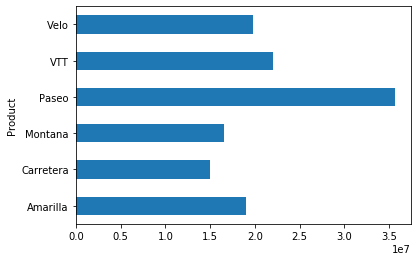

In [5]:
%matplotlib inline

df.groupby('Product')['Gross Sales'].sum().plot.barh()

In [6]:
# Da una tabella HTML

from urllib.request import urlopen
import re

with urlopen('https://www.atb.bergamo.it/it/atb-risponde/customer-satisfaction') as urlf:
    data = urlf.read().decode('utf-8')
    
data = re.sub(re.compile(r'(\d+)+,(\d+)'), r'\1.\2', data) # cambio le virgole in punti

In [7]:
df = pd.read_html(data, na_values = 'n.d.')[0]
df.columns = ['Tipo', 'R2018', 'R2017']
df

,Tipo,R2018,R2017
0,Orario di inizio e fine servizio,7.1,6.6
1,Frequenza delle corse,6.8,6.5
2,Rispetto delle corse e delle fermate previste,7.4,6.8
3,Copertura efficace del territorio servito,7.6,7.3
4,Posizione delle fermate e dei collegamenti,7.8,7.4
5,Possibilità di acquistare titoli di viaggio on...,7.6,NaN
6,Facilità di munirsi dei biglietti e degli abbo...,8.1,7.7
7,Facilità di trovare le informazioni sulla rete...,7.7,7.4
8,"Informazioni alle fermate (video, cartelli)",7.6,7.2
9,Puntualità delle corse,6.2,6.4


In [8]:
# Cosa è peggiorato?

df[df.R2018 < df.R2017] 

,Tipo,R2018,R2017
9,Puntualità delle corse,6.2,6.4
14,Livello di risposta alle richieste sul servizi...,6.7,6.8
16,Frequenza controlli dei titoli di viaggio da p...,6.1,6.7
19,Affollamento dei mezzi / spazio a bordo,5.4,5.6


# Un dataset open

Da [Comune Bergamo - Incidenti stradali](https://www.dati.lombardia.it/Mobilit-e-trasporti/Comune-Bergamo-Incidenti-stradali/hds3-pqjq).

In [9]:
from urllib.request import urlopen
from json import loads

limit = 21000
data = loads(urlopen(f'https://www.dati.lombardia.it/resource/hds3-pqjq.json?$limit={limit}').read())

In [10]:
len(data), data[0]

(21000,
 {'protocollo': '2017/001774',
  'anno': '2017',
  'data': '2017-12-31T00:00:00.000',
  'ora': '20:20',
  'localita': "BERGAMO VIA BIANZANA all'intersezione con VIA SERASSI",
  'naturaincidente': 'Scontro frontale/laterale SX fra veicoli in marcia',
  'n_illesi': '5',
  'n_feriti': '0',
  'n_riservata': '0',
  'n_morti': '0',
  'pedoni': False,
  'velocipedi': False,
  'ciclomotori_motocicli': False,
  'mezzi_pesanti': False,
  'localizzazione': {'latitude': '45.7048', 'longitude': '9.6929'},
  ':@computed_region_6hky_swhk': '5',
  ':@computed_region_ttgh_9sm5': '5'})

In [11]:
import pandas as pd
from operator import itemgetter

LOC = itemgetter('localizzazione')
N_KEYS = frozenset(k for k in data[0].keys() if k.startswith('n_'))
K_KEYS = frozenset({'pedoni', 'velocipedi', 'ciclomotori_motocicli', 'mezzi_pesanti'})

def extract(dct):
    res = {'data': pd.to_datetime(dct['data'][:11]+dct['ora'])}
    res.update(LOC(dct))
    res.update({k: dct[k] for k in N_KEYS})
    res.update({k: dct[k] for k in K_KEYS})
    return res

incidenti = pd.DataFrame(map(extract, data))
for k in ['latitude', 'longitude'] + list(N_KEYS): 
    incidenti[k] = pd.to_numeric(incidenti[k])

incidenti = incidenti[incidenti.data.dt.year >= 2007]    
    
incidenti.head()

,data,latitude,longitude,n_morti,n_illesi,n_feriti,n_riservata,ciclomotori_motocicli,velocipedi,pedoni,mezzi_pesanti
0,2017-12-31 20:20:00,45.7048,9.6929,0,5,0,0,False,False,False,False
1,2017-12-31 23:55:00,45.6938,9.6712,0,3,0,0,False,False,False,False
2,2017-12-30 17:40:00,45.6889,9.6704,0,4,0,0,False,False,False,False
3,2017-12-30 13:20:00,45.6896,9.6692,0,4,1,0,True,False,False,False
4,2017-12-29 07:15:00,45.6774,9.6848,0,3,0,0,False,False,False,False


In [12]:
len(incidenti), incidenti['data'].min(), incidenti['data'].max()

(20771, Timestamp('2007-01-01 10:55:00'), Timestamp('2017-12-31 23:55:00'))

In [13]:
CENTER = incidenti[['latitude', 'longitude']].mean().values.tolist()
CENTER

[45.6916640556556, 9.671042727841968]

Giocando con [folium](https://python-visualization.github.io/folium/) per i dati georeferenziati…

In [14]:
import folium
from folium.plugins import FastMarkerCluster

base_map = folium.Map(location = CENTER, zoom_start = 12)
FastMarkerCluster(
    data = incidenti[['latitude', 'longitude']].values.tolist(),
).add_to(base_map)
base_map

In [15]:
from folium.plugins import HeatMap

base_map = folium.Map(location = CENTER, zoom_start = 12)
HeatMap(
    data = incidenti[['latitude', 'longitude', 'n_morti']].values.tolist(), 
    radius = 12, 
    max_zoom = 16
).add_to(base_map)
base_map

In [16]:
from folium.plugins import HeatMapWithTime

base_map = folium.Map(location = CENTER, zoom_start = 12)

incidenti_months = []
for month in incidenti['data'].dt.month.sort_values().unique():
    incidenti_months.append(incidenti[incidenti['data'].dt.month == month][['latitude', 'longitude']].values.tolist())

In [17]:
base_map = folium.Map(location = CENTER, zoom_start = 14)

HeatMapWithTime(
    data = incidenti_months, 
    radius = 16, 
).add_to(base_map)
base_map

## Con seaborn

Usando [seaborn](https://seaborn.pydata.org/)

In [18]:
import seaborn as sns

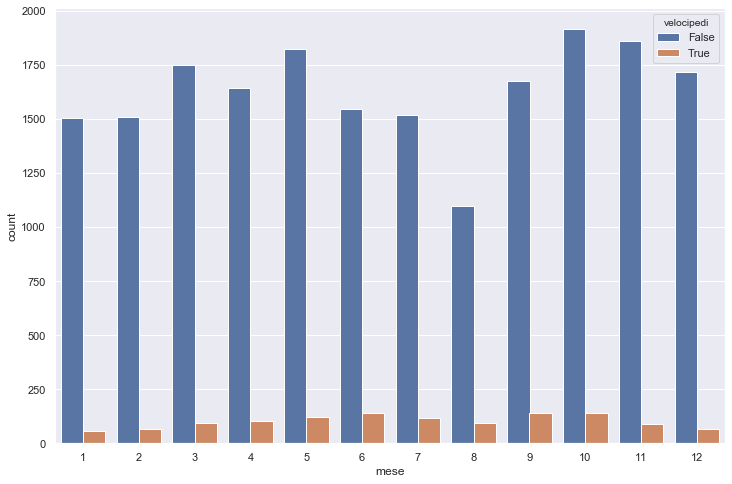

In [19]:
%matplotlib inline 

import seaborn as sns

sns.set(rc = {'figure.figsize': (12, 8)})

d = incidenti.copy()
d['mese'] = d.data.dt.month

#.groupby(incidenti.data.dt.month)[list(N_KEYS)].sum()
sns.countplot(x = 'mese', hue = 'velocipedi', data = d)

In [20]:
# numero di incidenti per mese e tipo di veicolo

imv = incidenti.groupby(incidenti.data.dt.month)[['pedoni', 'velocipedi', 'mezzi_pesanti', 'ciclomotori_motocicli']].sum().astype(int)
imv

,pedoni,velocipedi,mezzi_pesanti,ciclomotori_motocicli
data,,,,
1,140,57,68,353
2,105,64,89,389
3,130,92,76,561
4,104,105,61,511
5,112,123,94,632
6,78,138,84,545
7,78,115,66,535
8,66,95,44,379
9,127,138,69,638


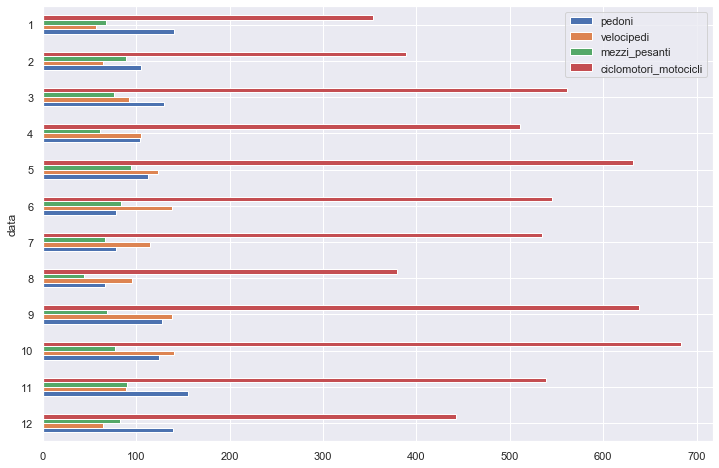

In [21]:
imv.iloc[::-1,:].plot.barh()

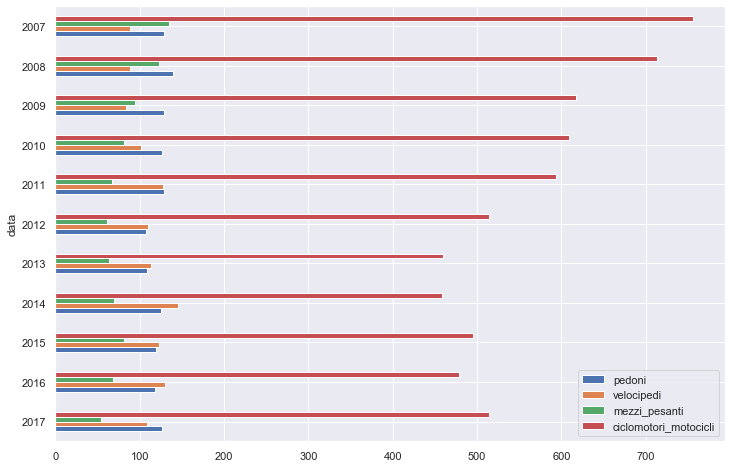

In [22]:
# numero di incidenti per anno e tipo di veicolo

incidenti.groupby(incidenti.data.dt.year)[['pedoni', 'velocipedi', 'mezzi_pesanti', 'ciclomotori_motocicli']].sum().astype(int).iloc[::-1,:].plot.barh()